In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install pmdarima

In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0
...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9
11890,22-07-2022,28.3,26.0,30.5,3.0
11891,23-07-2022,28.2,25.8,31.3,5.1
11892,24-07-2022,28.1,25.6,30.4,7.1


In [ ]:
# Display the dataframe
print(weather_df.head())


         time  tavg  tmin  tmax  prcp
0  01-01-1990  23.2  17.0   NaN   0.0
1  02-01-1990  22.2  16.5  29.9   0.0
2  03-01-1990  21.8  16.3  30.7   0.0
3  04-01-1990  25.4  17.9  31.8   0.0
4  05-01-1990  26.5  19.3  33.7   0.0


In [ ]:
# Fill missing values with the previous valid value
weather_df.ffill(inplace=True)


In [ ]:
# Check for missing data
missing_data = weather_df.isnull().sum()
print(missing_data)

time    0
tavg    0
tmin    0
tmax    1
prcp    0
dtype: int64


time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11883 non-null  float64
 2   tmin    9440 non-null   float64
 3   tmax    9987 non-null   float64
 4   prcp    7213 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB
None
               tavg         tmin         tmax         prcp
count  11883.000000  9440.000000  9987.000000  7213.000000
mean      27.762509    22.618549    32.315040    10.942007
std        2.189138     3.803629     2.234577    29.808576
min       17.700000     8.500000    22.300000     0.000000
25%       26.600000    19.800000    30.900000     0.000000
50%       28.100000    23.700000    32.400000     0.000000
75%       29.300000    25.400000    33.900000     7.100000
max       33.700000    3

<Figure size 1200x720 with 0 Axes>

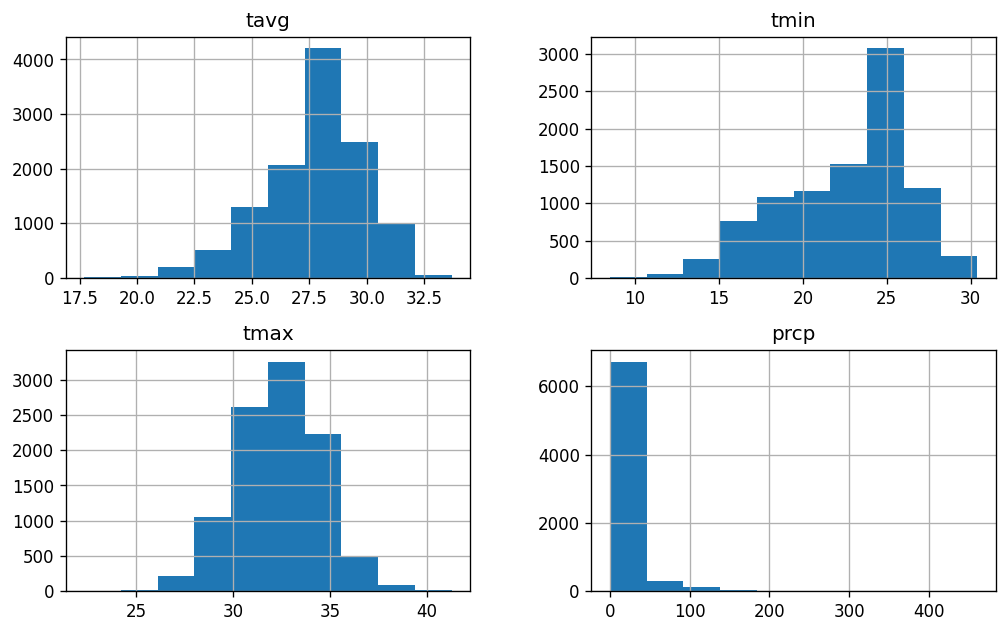

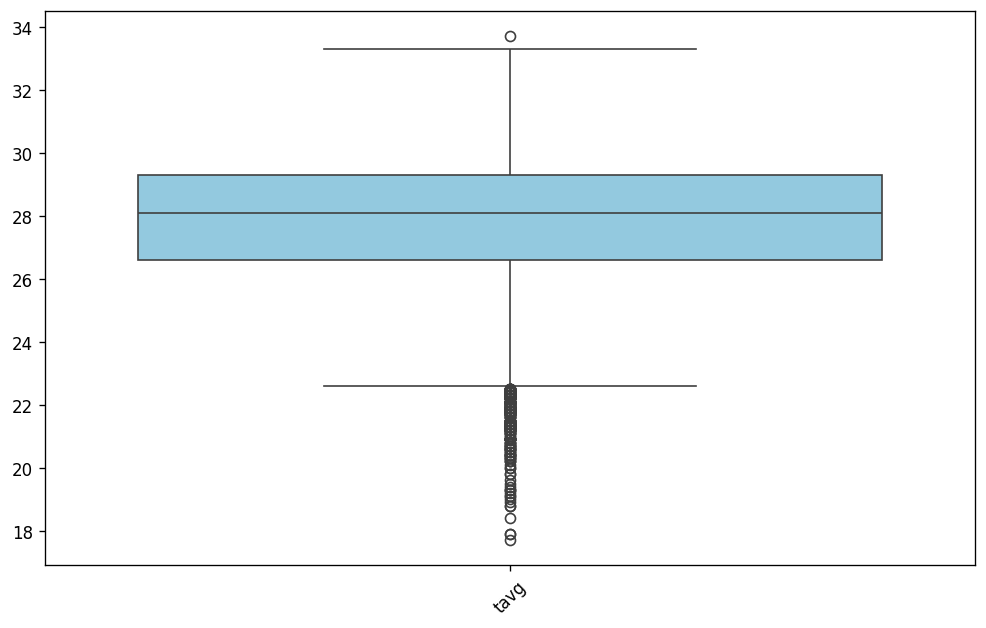

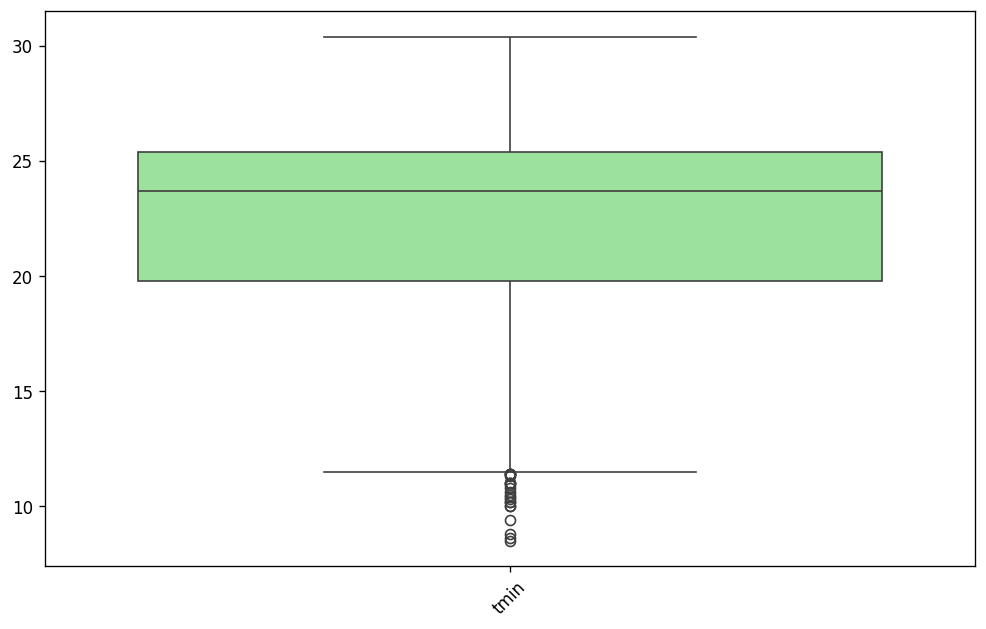

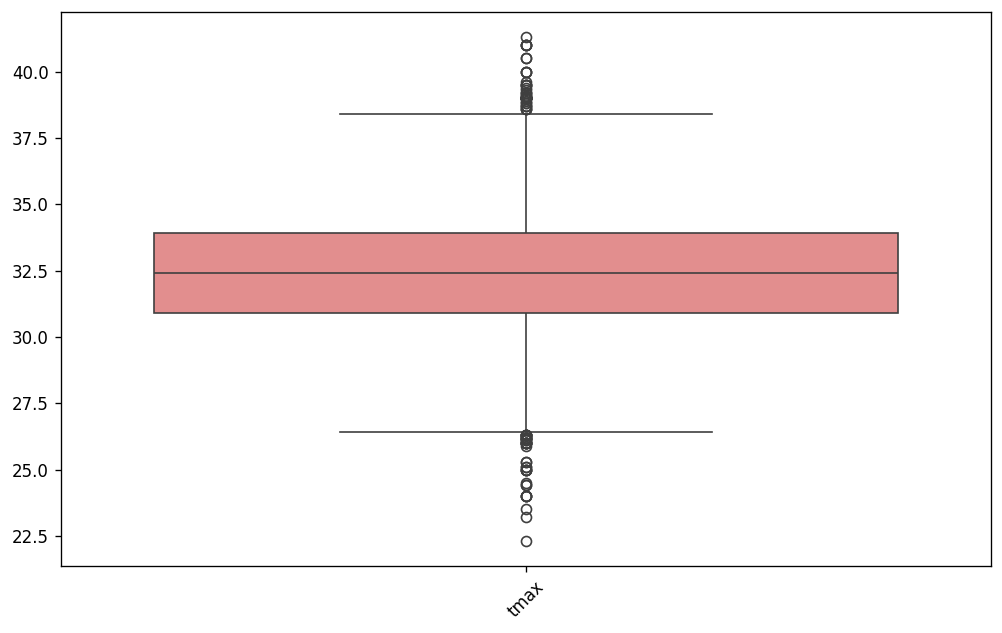

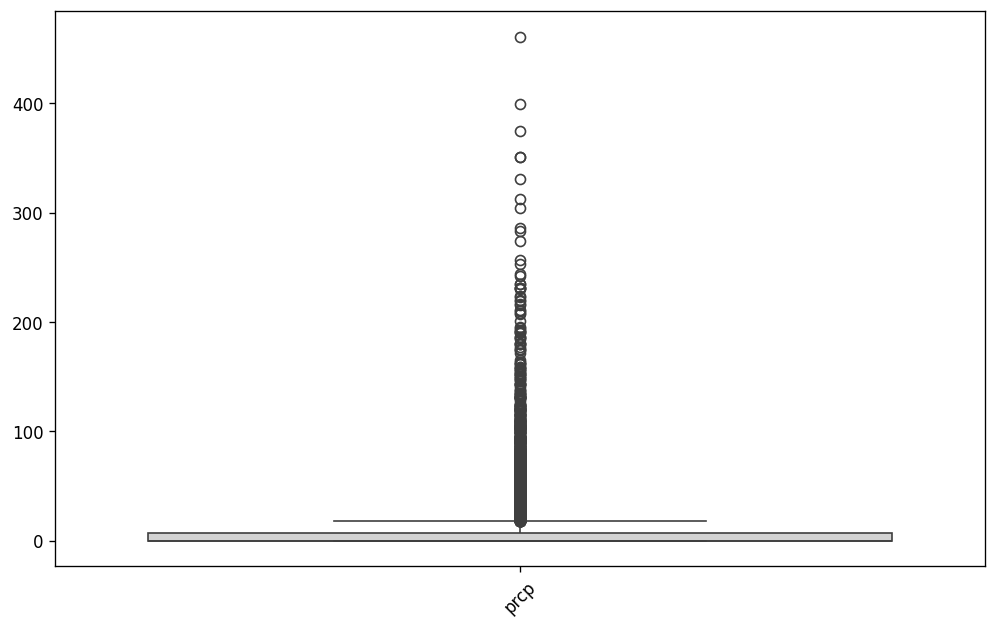

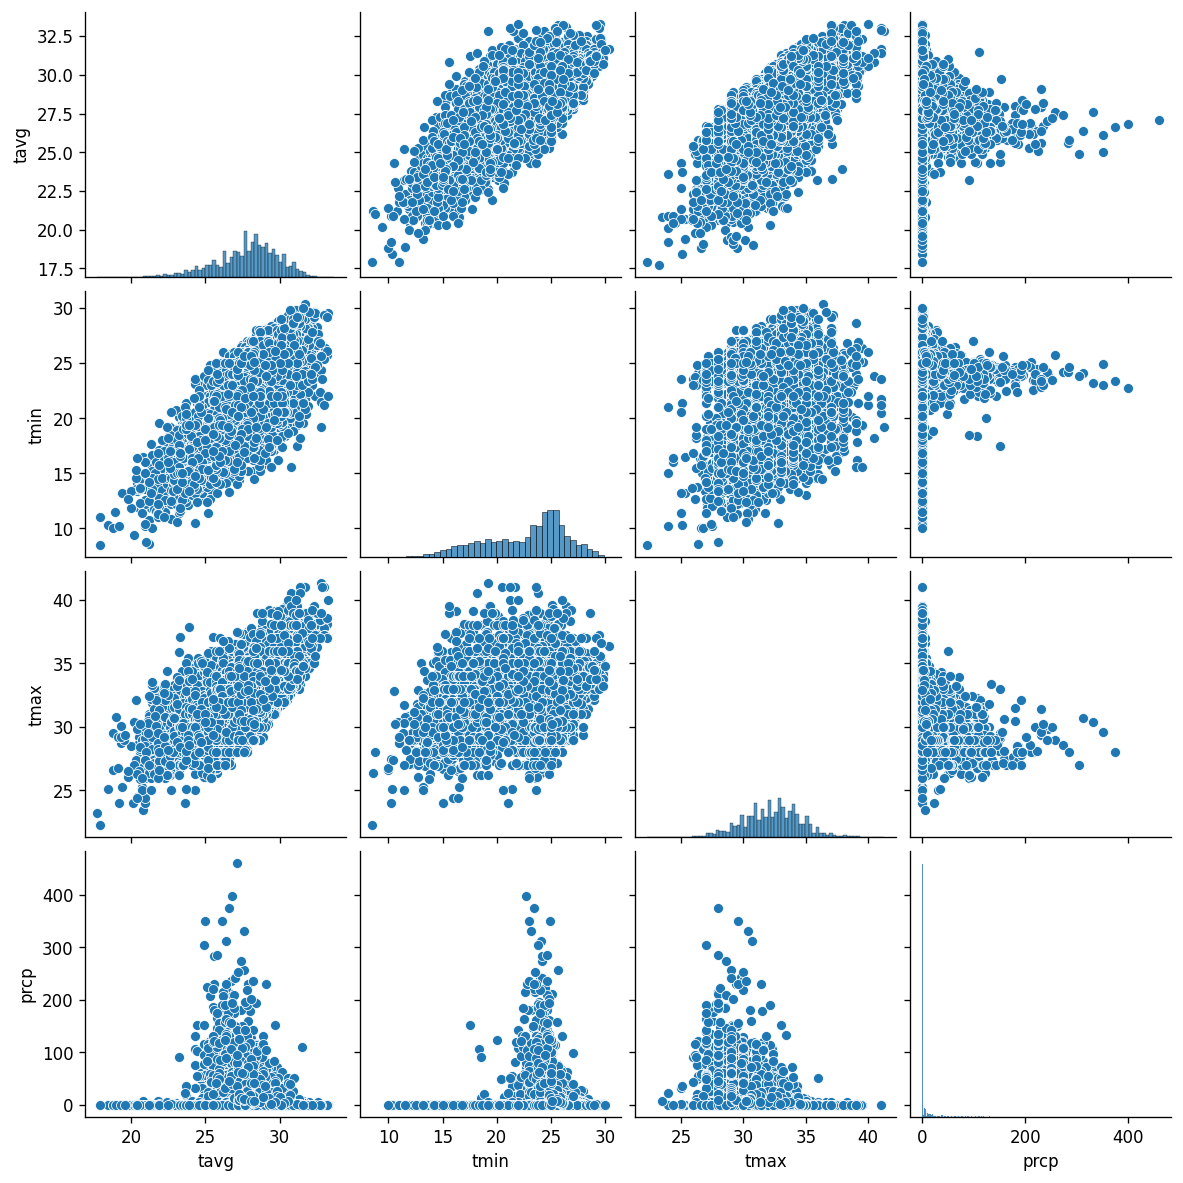

(-10.74970770122998, 2.6847967990919543e-19, 39, 11843, {'1%': -3.4309022855647804, '5%': -2.861784081549966, '10%': -2.566899919546274}, 30473.74831974162)


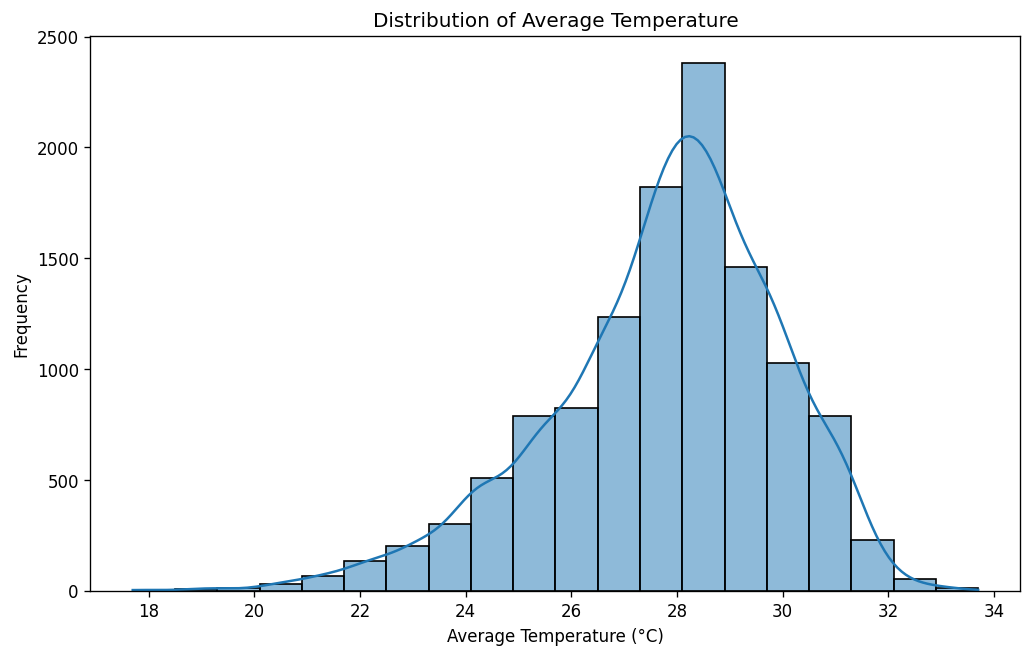

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Assuming your data resides in your Google Drive
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')

# Check for missing values
print(weather_df.isnull().sum())

# Get basic information about the data
print(weather_df.info())

# Descriptive statistics for numerical features
print(weather_df.describe())

# Visualize distribution of numerical features using histograms
plt.figure(figsize=(10, 6))
weather_df.hist(figsize=(10, 6))
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_df[['tavg']], color='skyblue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_df[['tmin']], color='lightgreen')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_df[['tmax']], color='lightcoral')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_df[['prcp']], color='lightgrey')
plt.xticks(rotation=45)
plt.show()

# Analyze relationships between features using scatter plots
sns.pairplot(weather_df[["tavg", "tmin", "tmax", "prcp"]])  # Select relevant columns
plt.show()

# Check for stationarity using Dickey-Fuller test
print(adfuller(weather_df['tavg'].dropna()))

# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['tavg'], bins=20, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


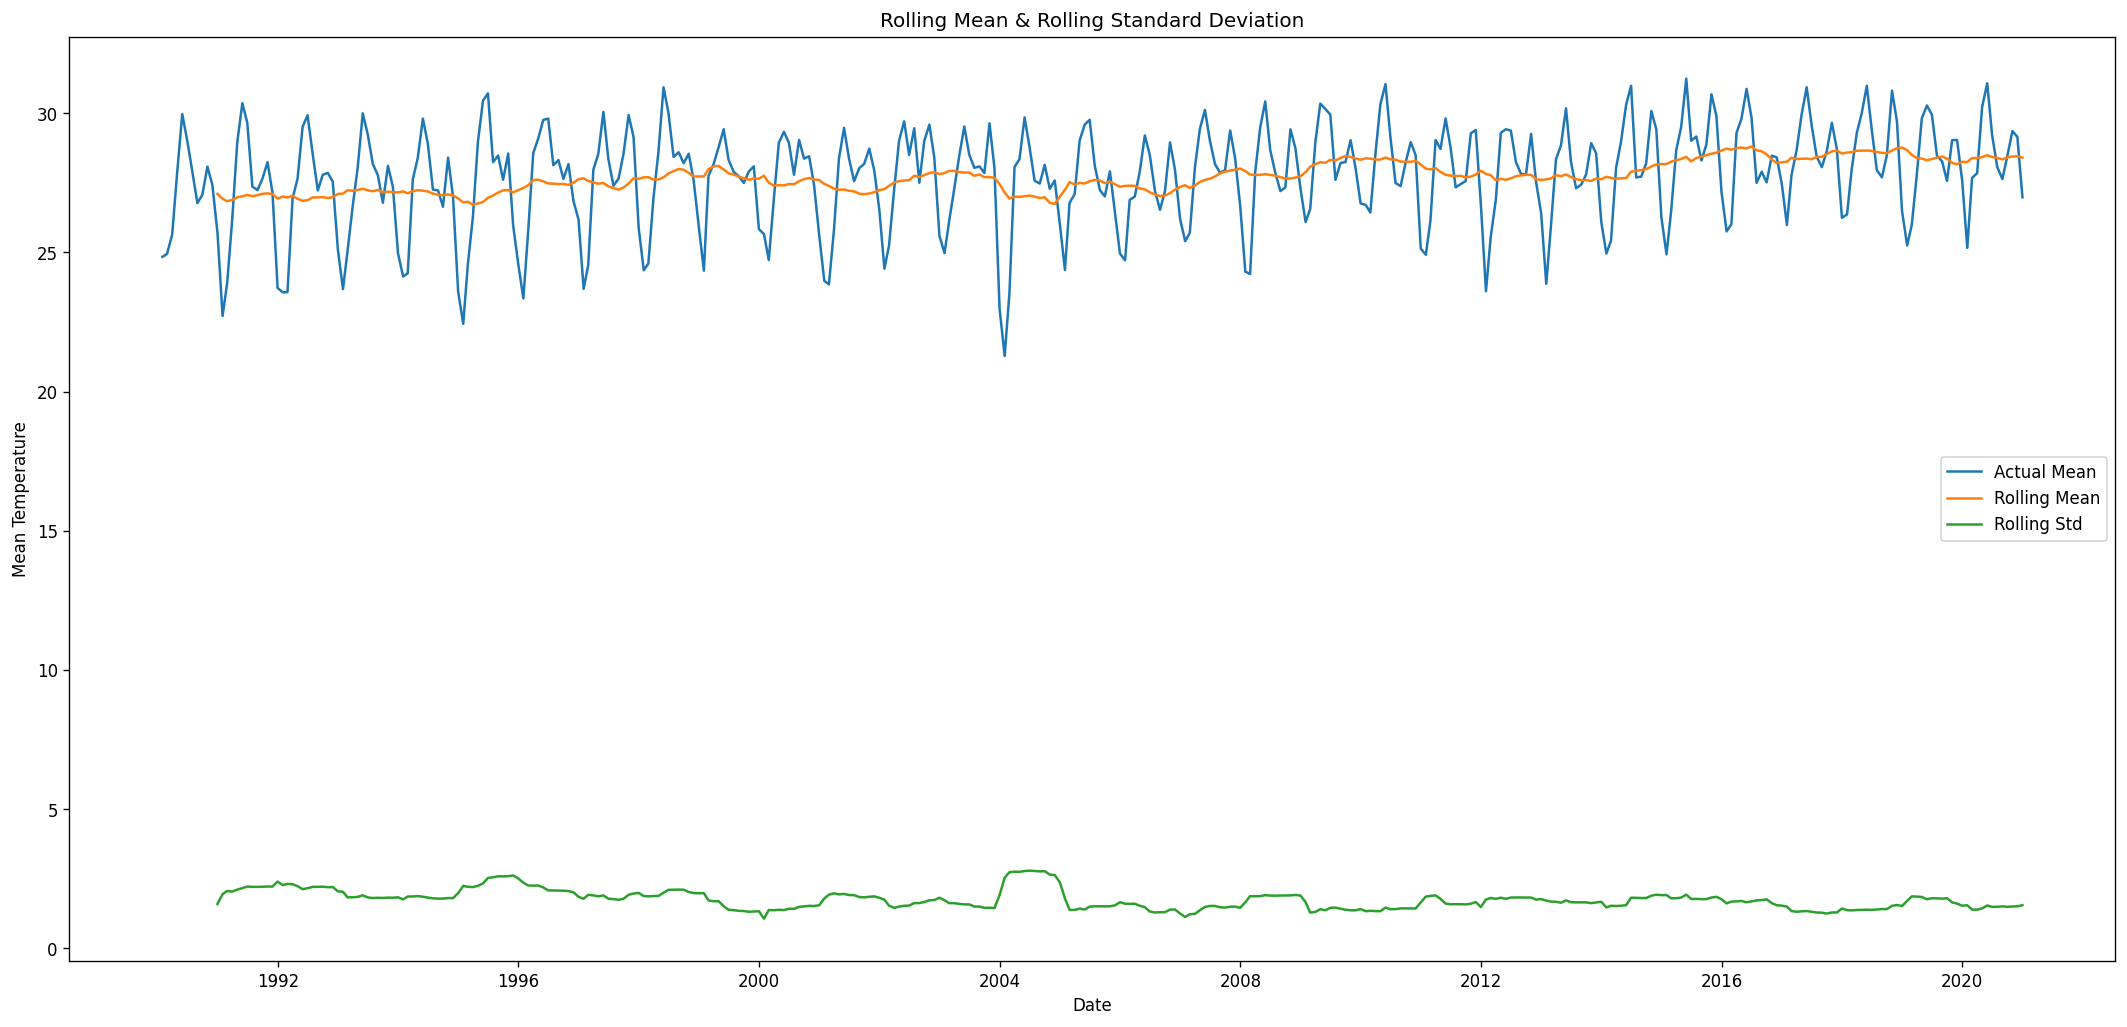

Test statistic: -2.001398450120136
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}


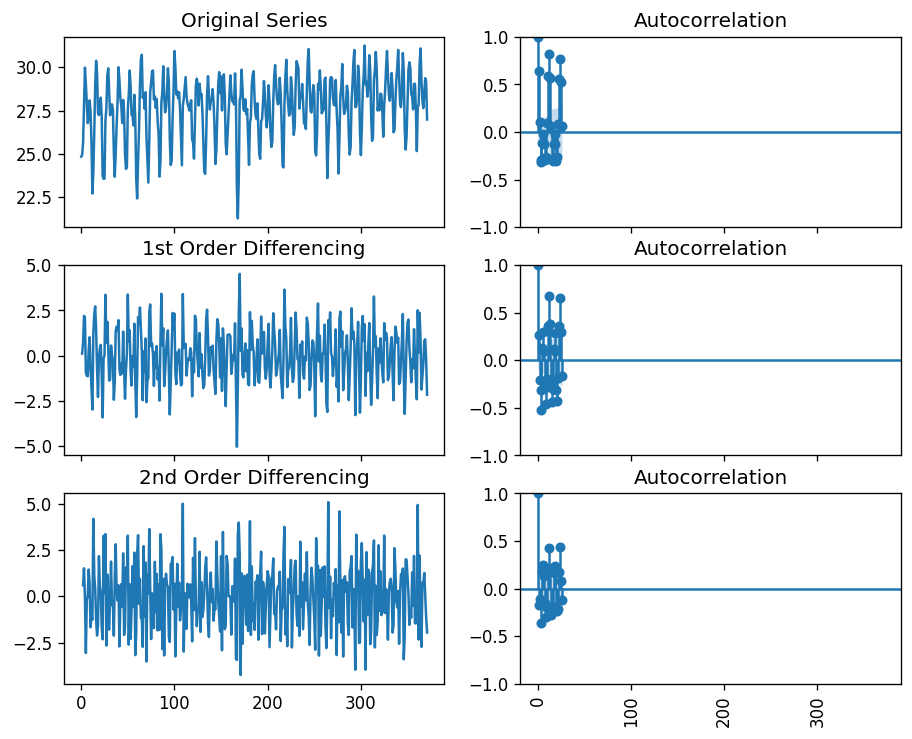

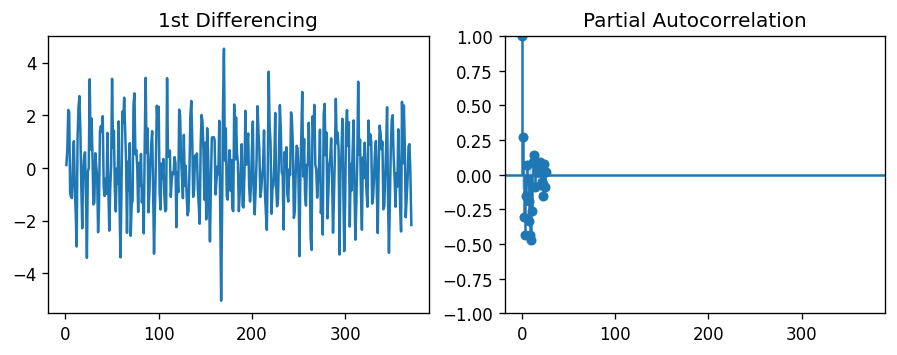

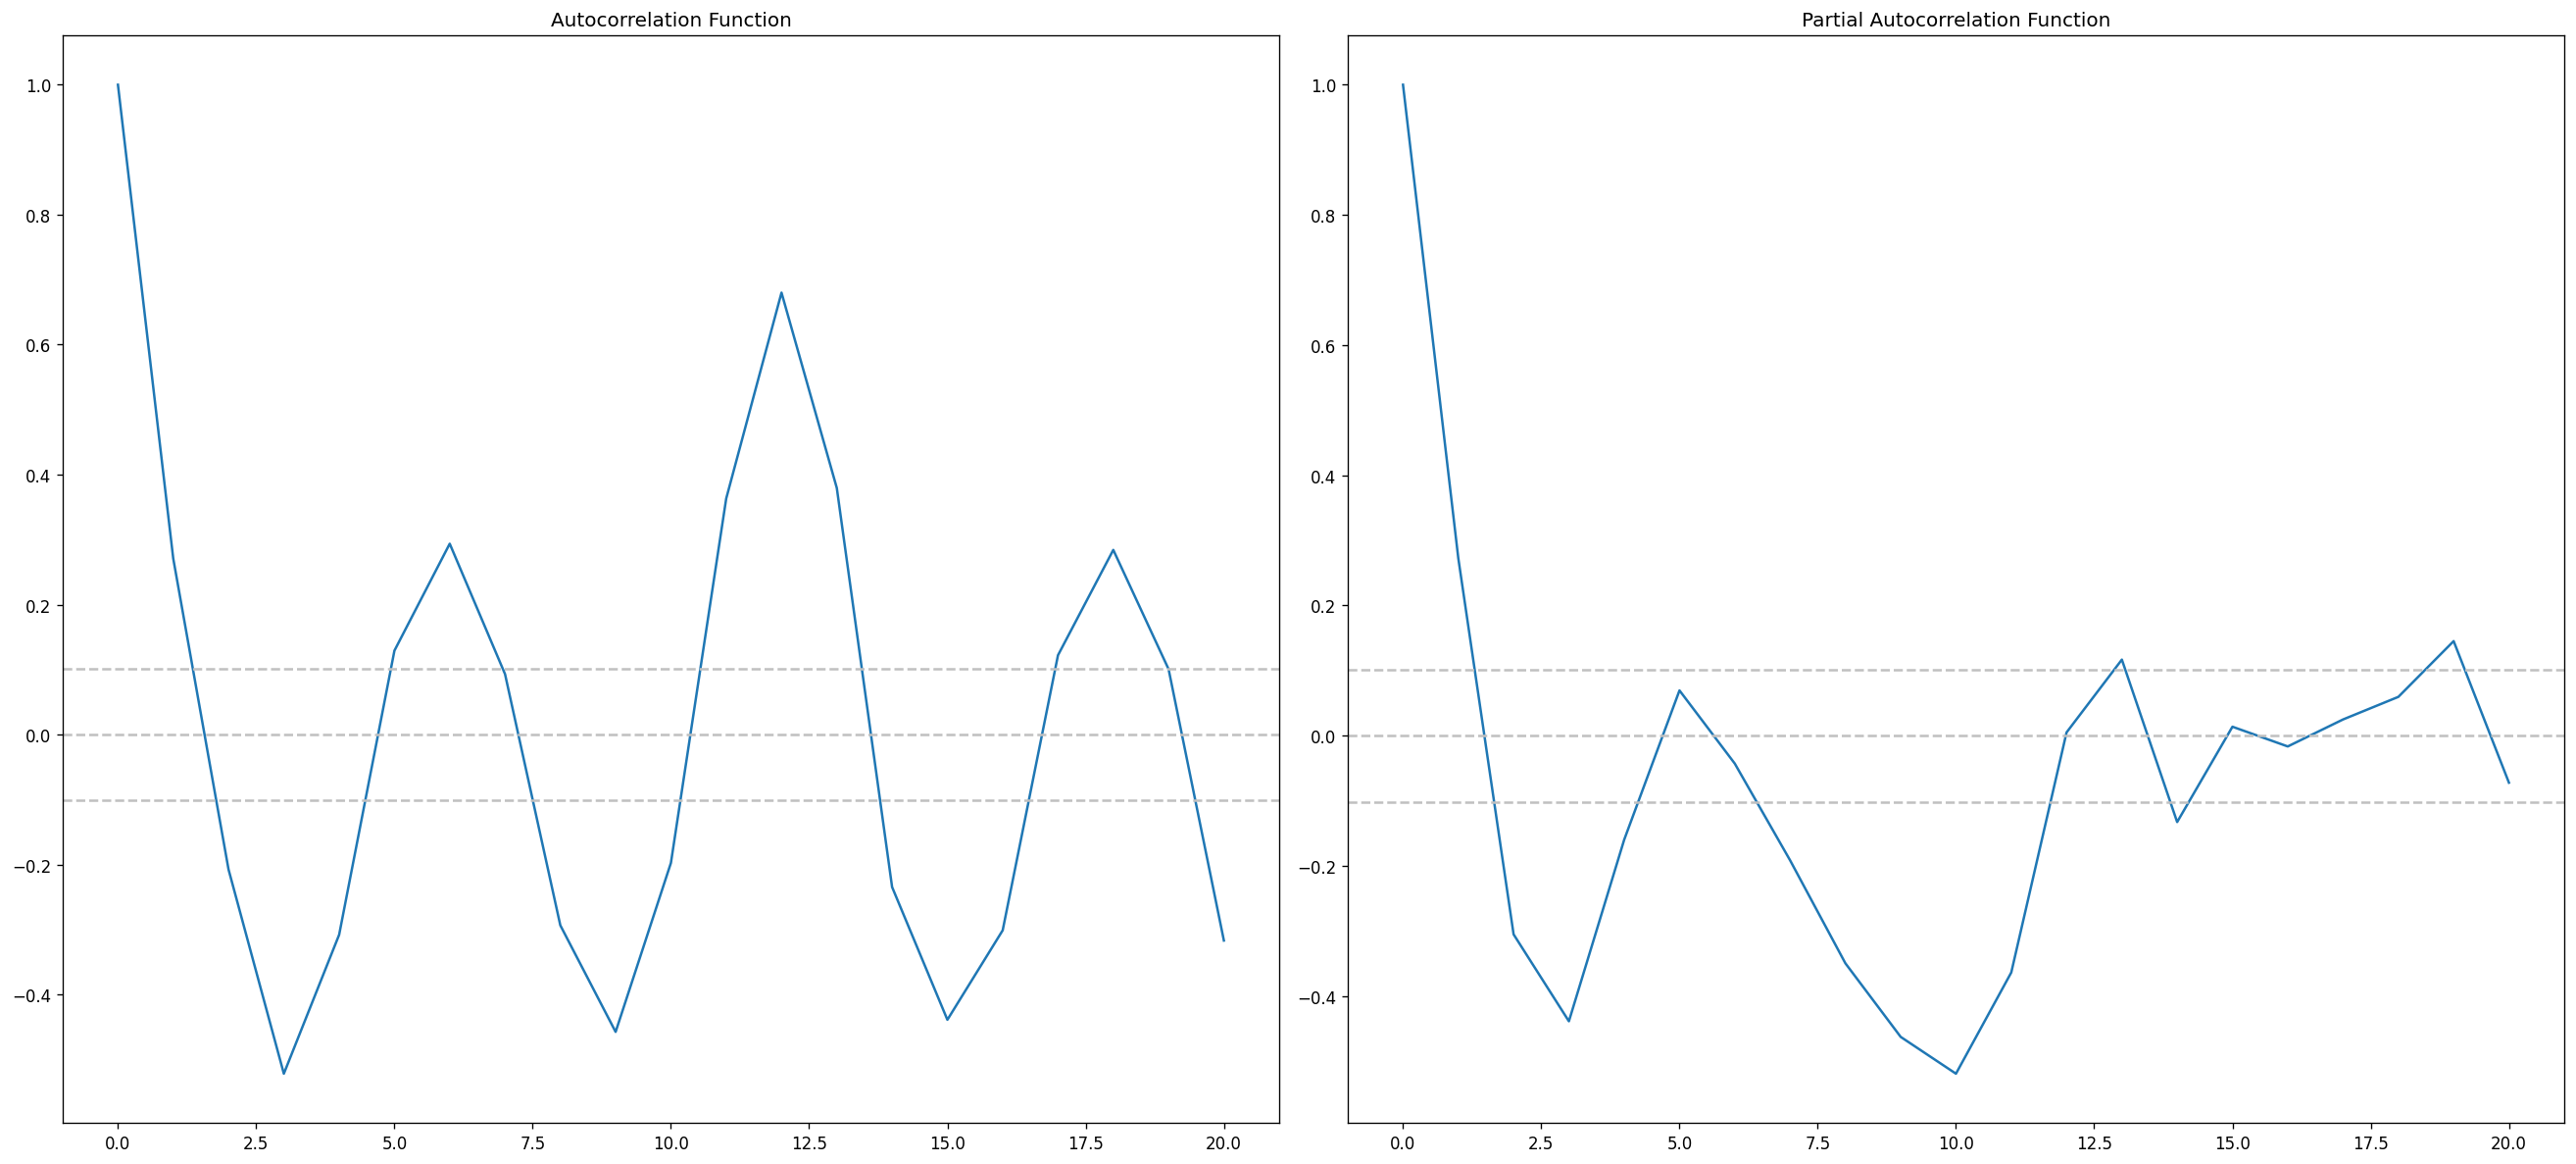

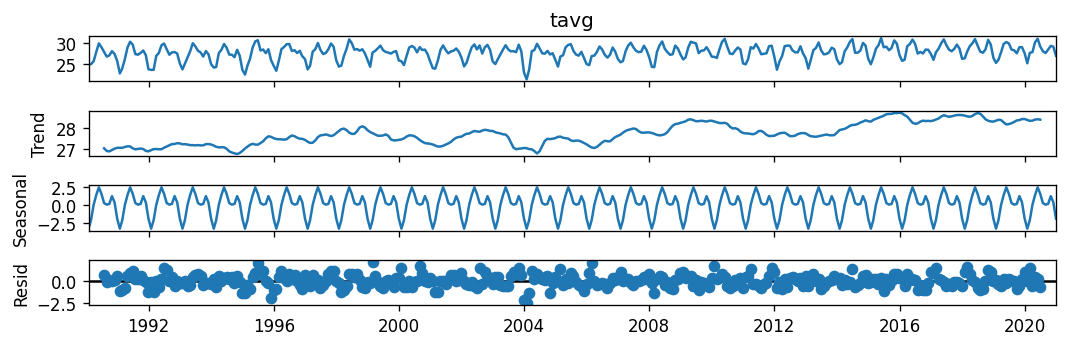

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)
weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[weather_df['tavg'] < 50]
weather_df = weather_df[weather_df['tavg'] <= 100]

# Define training and test sets
train_df = weather_df['1990':'2020'].resample('M').mean().fillna(method='pad')
test_df = weather_df['2020':'2025'].resample('M').mean().fillna(method='pad')

# Check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))
    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

plot_rolling_mean_std(train_df['tavg'])

# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic:', result[0])
    print('Critical Values:', result[4])

perform_dickey_fuller_test(train_df['tavg'])

# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df['tavg'].values);
axes[0, 0].set_title('Original Series')
plot_acf(train_df['tavg'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train_df['tavg'].diff().values);
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_df['tavg'].diff().dropna().values, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train_df['tavg'].diff().diff().values);
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_df['tavg'].diff().diff().dropna().values, ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

# Partial Autocorrelation Function (PACF) of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df['tavg'].diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train_df['tavg'].diff().dropna().values, ax=axes[1])

plt.show()

# Autocorrelation and Partial Autocorrelation Functions
acf_lag = acf(train_df['tavg'].diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df['tavg'].diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0, linestyle='--', color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df['tavg'].diff().values)), linestyle='--', color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df['tavg'].diff().values)), linestyle='--', color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0, linestyle='--', color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df['tavg'].diff().values)), linestyle='--', color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df['tavg'].diff().values)), linestyle='--', color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

# Seasonal Decompose
result = seasonal_decompose(train_df['tavg'], model='additive', period=12)
result.plot()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)

weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[(weather_df['tavg'] < 50) & (weather_df['tavg'] > -50)]

# Define training and test sets
train_df = weather_df['1990':'2022'].resample('M').mean().fillna(method='pad')
test_df = weather_df['2022':'2026'].resample('M').mean().fillna(method='pad')

# ARIMA Model
model_arima = ARIMA(train_df['tavg'], order=(2, 1, 2))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=len(test_df))

# Model Evaluation
mae_arima = mean_absolute_error(test_df['tavg'], forecast_arima)
mse_arima = mean_squared_error(test_df['tavg'], forecast_arima)
rmse_arima = np.sqrt(mse_arima)

# Plot forecast vs actuals for ARIMA
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['tavg'], mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['tavg'], mode='lines', name='Actual Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_arima, mode='lines', name='ARIMA Forecast', line=dict(color='red')))
fig.update_layout(title='ARIMA Forecast vs Actuals',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train_df['tavg'], seasonal='additive', seasonal_periods=12)
model_hw_fit = model_hw.fit()
forecast_hw = model_hw_fit.forecast(len(test_df))

# Plot forecast vs actuals for Holt-Winters
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['tavg'], mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['tavg'], mode='lines', name='Actual Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_hw, mode='lines', name='Holt-Winters Forecast', line=dict(color='orange')))
fig.update_layout(title='Holt-Winters Forecast vs Actuals',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# SARIMA Model
model_sarima = SARIMAX(train_df['tavg'], order=(2, 0, 2), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=len(test_df))

# Model Evaluation
mae_sarima = mean_absolute_error(test_df['tavg'], forecast_sarima)
mse_sarima = mean_squared_error(test_df['tavg'], forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)

# Plot forecast vs actuals for SARIMA
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['tavg'], mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['tavg'], mode='lines', name='Actual Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_sarima, mode='lines', name='SARIMA Forecast', line=dict(color='purple')))
fig.update_layout(title='SARIMA Forecast vs Actuals',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# Print model evaluation metrics
print("ARIMA:")
print("MAE:", mae_arima)
print("MSE:", mse_arima)
print("RMSE:", rmse_arima)

print("SARIMA:")
print("MAE:", mae_sarima)
print("MSE:", mse_sarima)
print("RMSE:", rmse_sarima)

# Extend the SARIMA forecast till 2025
forecast_sarima_extended = model_sarima_fit.forecast(steps=len(test_df) + 36)  # Forecasting for additional 36 months (till 2025)

# Plot forecast vs actuals for SARIMA including forecast till 2025
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['tavg'], mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['tavg'], mode='lines', name='Actual Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_sarima, mode='lines', name='SARIMA Forecast', line=dict(color='purple')))
fig.add_trace(go.Scatter(x=pd.date_range(start=test_df.index[-1], periods=37, freq='M')[1:], y=forecast_sarima_extended, mode='lines', name='Extended Forecast', line=dict(color='pink')))
fig.update_layout(title='SARIMA Forecast vs Actuals with Forecast till 2025',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# Extend the ARIMA forecast till 2025
forecast_arima_extended = model_arima_fit.forecast(steps=len(test_df) + 36)  # Forecasting for additional 36 months (till 2025)

# Plot forecast vs actuals for ARIMA including forecast till 2025
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['tavg'], mode='lines', name='Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['tavg'], mode='lines', name='Actual Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_arima, mode='lines', name='ARIMA Forecast', line=dict(color='red')))
fig.add_trace(go.Scatter(x=pd.date_range(start=test_df.index[-1], periods=37, freq='M')[1:], y=forecast_arima_extended, mode='lines', name='Extended Forecast', line=dict(color='orange')))
fig.update_layout(title='ARIMA Forecast vs Actuals with Forecast till 2025',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA:
MAE: 1.675726589011467
MSE: 4.754734246138383
RMSE: 2.1805353118301896
SARIMA:
MAE: 2.4735049638302984
MSE: 7.938935025032748
RMSE: 2.8176115816472556


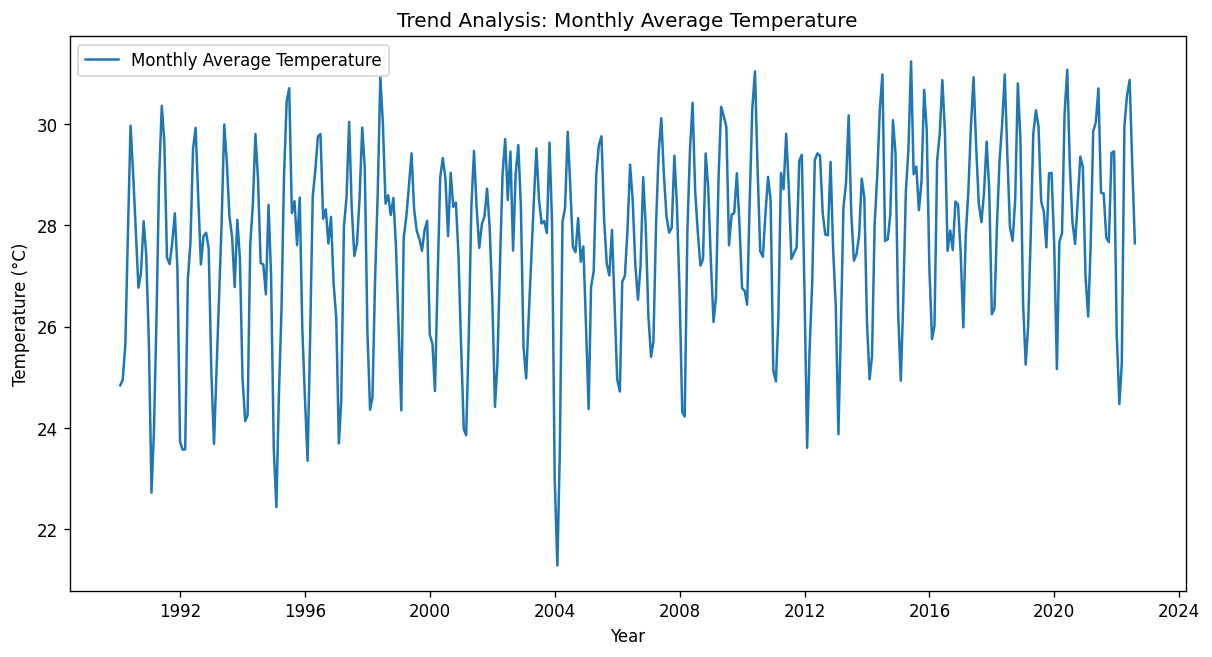

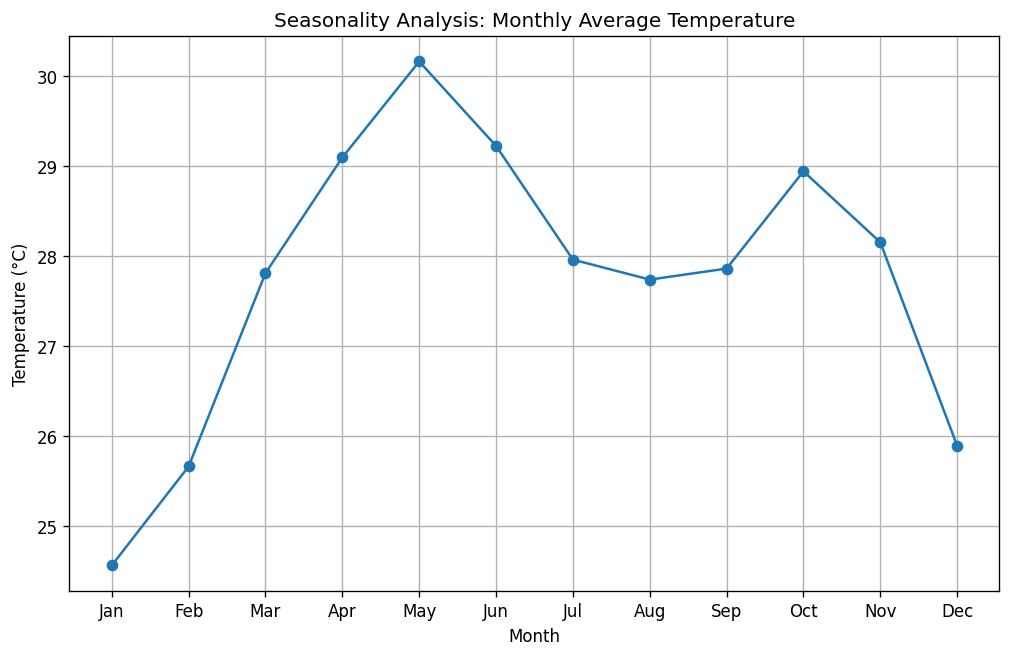

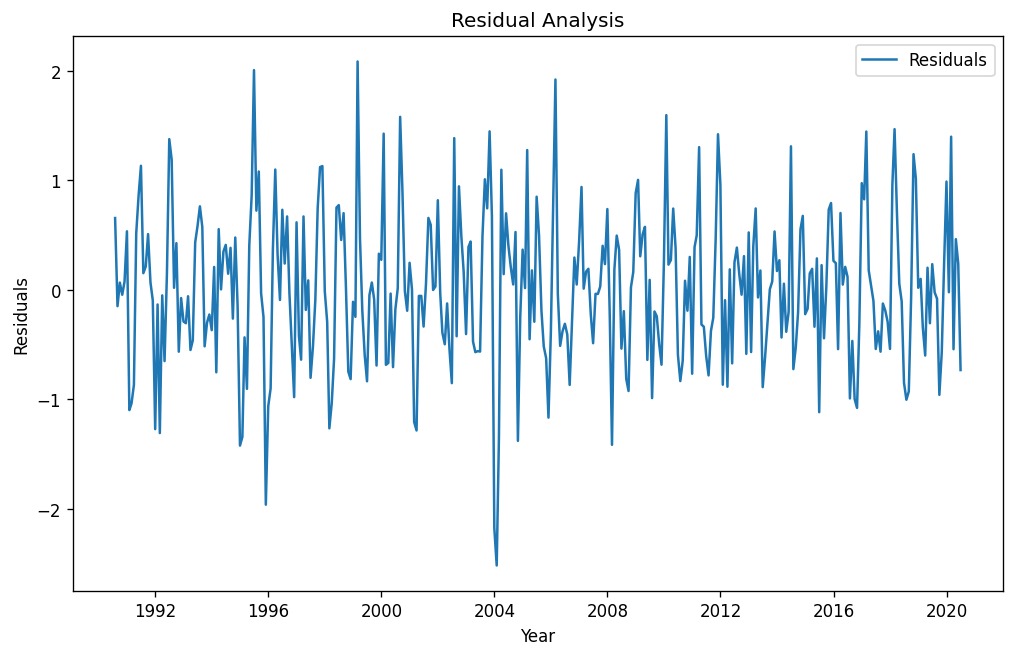

Columns 'humidity' and 'pressure' are not present in the dataset.


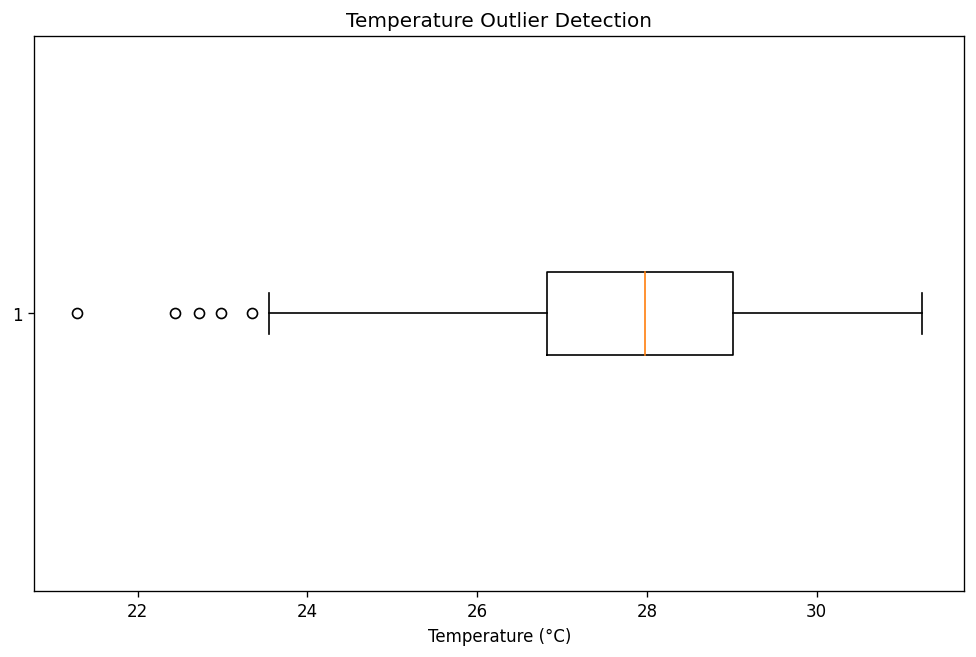

In [ ]:
train_df = train_df['1990':'2022']
# Trend Analysis
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['tavg'], label='Monthly Average Temperature')
plt.title('Trend Analysis: Monthly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Seasonality Analysis
plt.figure(figsize=(10, 6))
monthly_seasonality = train_df.groupby(train_df.index.month)['tavg'].mean()
plt.plot(monthly_seasonality.index, monthly_seasonality.values, marker='o')
plt.title('Seasonality Analysis: Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

train_df = train_df['1990':'2022']
# Residual Analysis (using Seasonal Decompose)
residuals = result.resid.dropna()
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, label='Residuals')
plt.title('Residual Analysis')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Correlation Analysis
# Assuming there are additional variables like humidity, pressure, etc., in the dataset
if 'humidity' in weather_df.columns and 'pressure' in weather_df.columns:
    correlation_matrix = weather_df[['tavg', 'humidity', 'pressure']].corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
else:
    print("Columns 'humidity' and 'pressure' are not present in the dataset.")

# Extreme Events
extreme_threshold = 35  # Define a threshold for extreme temperatures (e.g., 35°C)
extreme_events = weather_df[weather_df['tavg'] > extreme_threshold]
if not extreme_events.empty:
    print("Extreme temperature events:")
    print(extreme_events)

# Outlier Detection
plt.figure(figsize=(10, 6))
plt.boxplot(train_df['tavg'], vert=False)
plt.title('Temperature Outlier Detection')
plt.xlabel('Temperature (°C)')
plt.show()


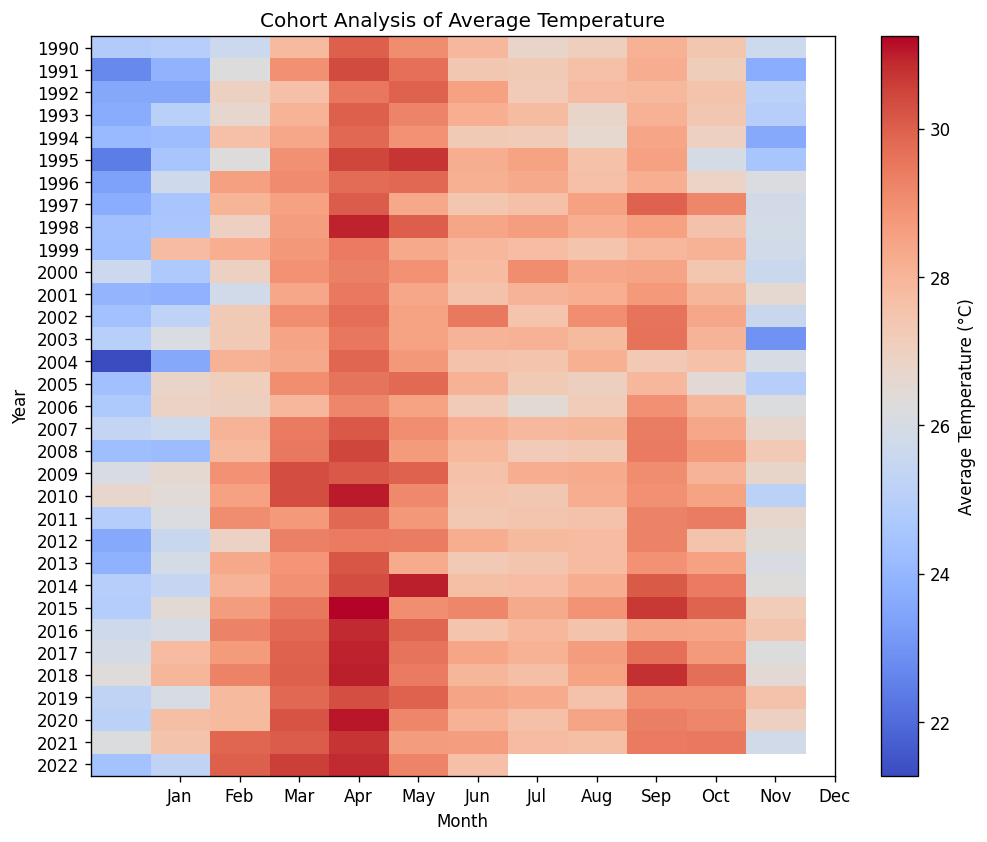

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)
weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[weather_df['tavg'] < 50]
weather_df = weather_df[weather_df['tavg'] <= 100]

# Extract year and month from the index
weather_df['year'] = weather_df.index.year
weather_df['month'] = weather_df.index.month

# Define function for cohort analysis
def cohort_analysis(df, start_year, end_year):
    cohorts = df.groupby(['year', 'month'])['tavg'].mean().unstack()
    cohorts = cohorts.loc[start_year:end_year]
    return cohorts

# Perform cohort analysis for the years 1990 to 2015
cohorts = cohort_analysis(weather_df, 1990, 2022)

# Plot cohort analysis heatmap
plt.figure(figsize=(10, 8))
plt.title('Cohort Analysis of Average Temperature')
plt.xlabel('Month')
plt.ylabel('Year')
plt.imshow(cohorts, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Average Temperature (°C)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(len(cohorts.index)), labels=cohorts.index)
plt.show()


KNN:
MAE: 9.199999999999948
MSE: 92.73142857142773
RMSE: 9.629715913329308


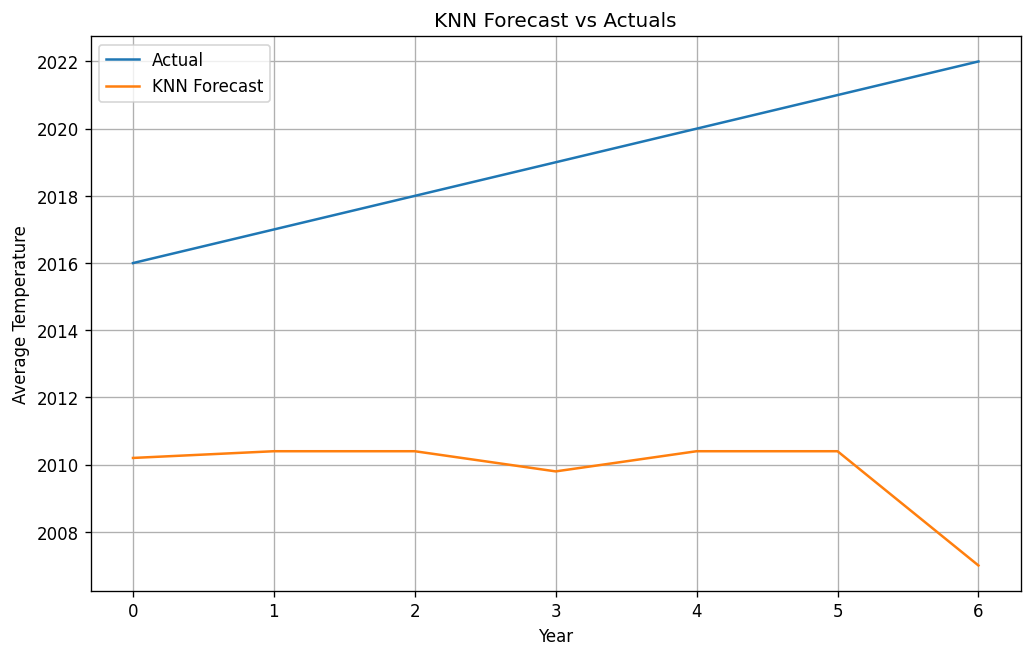

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)
weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[(weather_df['tavg'] < 50) & (weather_df['tavg'] <= 100)]

# Extract year and month from the index
weather_df['year'] = weather_df.index.year
weather_df['month'] = weather_df.index.month

# Define cohort analysis function
def cohort_analysis(df, start_year, end_year):
    cohorts = df.groupby(['year', 'month'])['tavg'].mean().unstack()
    cohorts = cohorts.loc[start_year:end_year]
    return cohorts

# Perform cohort analysis for the years 1990 to 2022
cohorts = cohort_analysis(weather_df, 1990, 2022)

# Prepare data for KNN
X = cohorts.reset_index().drop(['year'], axis=1)  # Features (excluding year)
y = cohorts.index  # Target (year)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_imputed, y_train)

# Forecast using the trained model
forecast_knn = knn_model.predict(X_test_imputed)

# Model evaluation
mae_knn = mean_absolute_error(y_test, forecast_knn)
mse_knn = mean_squared_error(y_test, forecast_knn)
rmse_knn = np.sqrt(mse_knn)

print("KNN:")
print("MAE:", mae_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)

# Plot forecast vs. actuals
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(forecast_knn, label='KNN Forecast')
plt.title('KNN Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/25
297/297 [==============================] - 18s 24ms/step - loss: 0.0133
Epoch 2/25
297/297 [==============================] - 7s 24ms/step - loss: 0.0061
Epoch 3/25
297/297 [==============================] - 6s 21ms/step - loss: 0.0055
Epoch 4/25
297/297 [==============================] - 8s 27ms/step - loss: 0.0048
Epoch 5/25
297/297 [==============================] - 6s 21ms/step - loss: 0.0039
Epoch 6/25
297/297 [==============================] - 7s 25ms/step - loss: 0.0034
Epoch 7/25
297/297 [==============================] - 6s 19ms/step - loss: 0.0034
Epoch 8/25
297/297 [==============================] - 3s 11ms/step - loss: 0.0033
Epoch 9/25
297/297 [==============================] - 5s 17ms/step - loss: 0.0032
Epoch 10/25
297/297 [==============================] - 3s 11ms/step - loss: 0.0032
Epoch 11/25
297/297 [==============================] - 3s 12ms/step - loss: 0.0032
Epoch 12/25
297/297 [==============================] - 3s 11ms/step - loss: 0.0033
Epoch 13/25


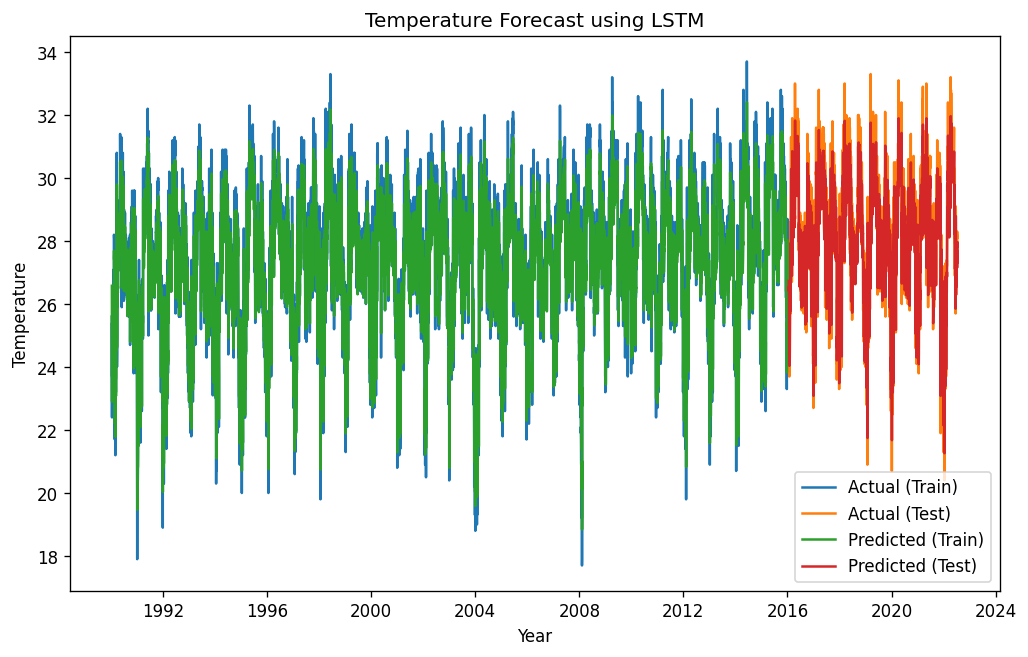

1/1 [==============================] - 0s 37ms/step
MSE: 0.8352398304511826
RMSE: 0.9139145640874657
MAE: 0.7081705552500648


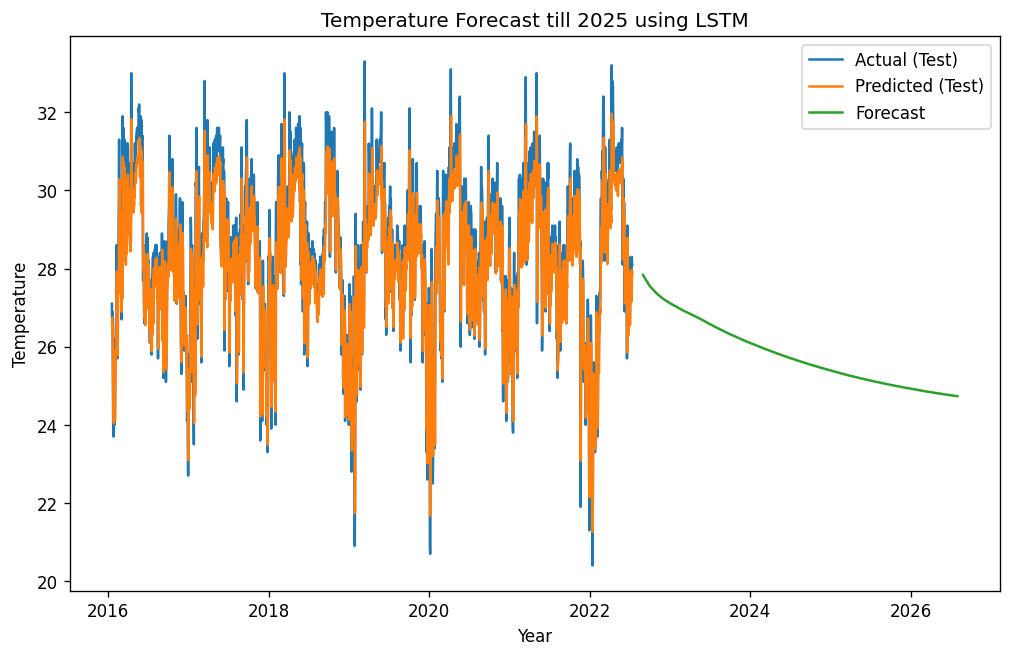

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)
weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[weather_df['tavg'] < 50]
weather_df = weather_df[weather_df['tavg'] <= 100]

# Extract the target variable
data = weather_df['tavg'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

# Convert the data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust this parameter as needed
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

# Reshape input data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE to evaluate the performance
train_rmse = np.sqrt(np.mean(np.square(train_predict - y_train)))
test_rmse = np.sqrt(np.mean(np.square(test_predict - y_test)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))

# Calculate years for train and test data
train_years = weather_df.index[seq_length:seq_length+len(y_train)]
test_years = weather_df.index[len(y_train) + seq_length:len(y_train) + len(y_test) + seq_length]

plt.plot(train_years, y_train, label='Actual (Train)')
plt.plot(test_years, y_test, label='Actual (Test)')
plt.plot(train_years, train_predict, label='Predicted (Train)')
plt.plot(test_years, test_predict, label='Predicted (Test)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using LSTM')
plt.legend()
plt.show()

# Forecast temperature till 2025
forecast_steps = 48  # Assuming each step represents a month, forecast for 4 years (48 months)
forecast = []

# Use the last sequence from the test data to predict the next value
current_sequence = X_test[-1]

for i in range(forecast_steps):
    # Reshape the current sequence for prediction
    current_sequence_reshaped = current_sequence.reshape(1, seq_length, 1)
    # Predict the next temperature
    next_temperature = model.predict(current_sequence_reshaped)
    # Append the predicted temperature to the forecast
    forecast.append(next_temperature[0, 0])
    # Update the current sequence by removing the first value and adding the predicted value
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_temperature

# Inverse transform the forecasted values
forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)

# Calculate MSE, RMSE, and MAE for the forecast
mse = np.mean((test_predict - y_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(test_predict - y_test))

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test_years, y_test, label='Actual (Test)')
plt.plot(test_years, test_predict, label='Predicted (Test)')
plt.plot(pd.date_range(test_years[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast till 2025 using LSTM')
plt.legend()
plt.show()


Epoch 1/25
297/297 [==============================] - 2s 4ms/step - loss: 0.0091
Epoch 2/25
297/297 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 3/25
297/297 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 4/25
297/297 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 5/25
297/297 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 6/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 7/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 8/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 9/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 10/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 11/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 12/25
297/297 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 13/25
297/297 [====

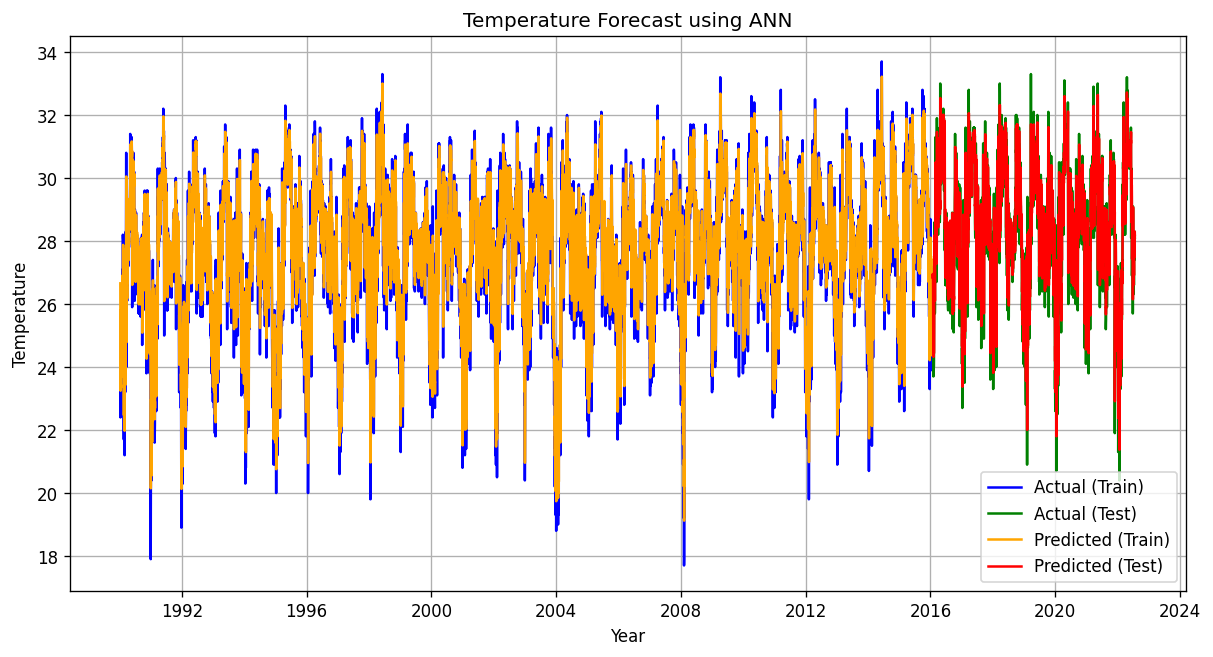

1/1 [==============================] - 0s 23ms/step


<ipython-input-26-b6807e008054>:115: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 [==============================] - 0s 43ms/step
MAE: 16.575114336823066
MSE: 3370.3169945758573
RMSE: 58.054431308693886


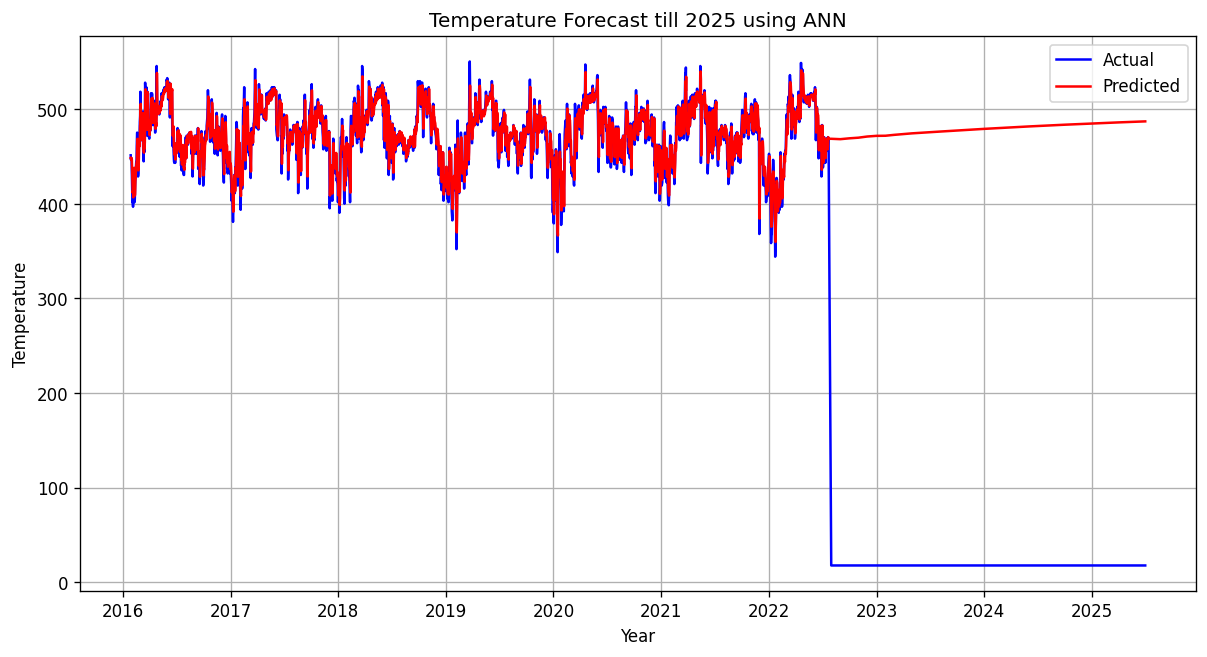

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
weather_df = pd.read_csv('/content/drive/MyDrive/Mumbai_1990_2022_Santacruz.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'], dayfirst=True)
weather_df.set_index('time', inplace=True)

# Preprocessing
weather_df.ffill(inplace=True)
weather_df = weather_df[weather_df['tavg'] < 50]
weather_df = weather_df[weather_df['tavg'] <= 100]

# Extract the target variable
data = weather_df['tavg'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

# Convert the data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust this parameter as needed
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(seq_length,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, and RMSE to evaluate the performance
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Extract years from index
years_train = weather_df.index[seq_length:seq_length+len(train_predict)]
years_test = weather_df.index[seq_length+len(train_predict)+seq_length-1:seq_length+len(train_predict)+seq_length-1+len(test_predict)]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years_train, y_train, label='Actual (Train)', color='blue')
plt.plot(years_test, y_test, label='Actual (Test)', color='green')
plt.plot(years_train, train_predict, label='Predicted (Train)', color='orange')
plt.plot(years_test, test_predict, label='Predicted (Test)', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using ANN')
plt.legend()
plt.grid(True)
plt.show()

# Forecast temperatures till 2025
forecast_steps = 36  # 3 years, assuming each step represents a month
forecast = []

# Use the last sequence from the test data to predict the next value
current_sequence = X_test[-1]

for i in range(forecast_steps):
    # Reshape the current sequence for prediction
    current_sequence_reshaped = current_sequence.reshape(1, seq_length)
    # Predict the next temperature
    next_temperature = model.predict(current_sequence_reshaped)
    # Append the predicted temperature to the forecast
    forecast.append(next_temperature[0, 0])
    # Update the current sequence by removing the first value and adding the predicted value
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_temperature

# Inverse transform the forecasted values
forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)

# Concatenate test predictions with forecast
all_test_predict = np.concatenate((test_predict, forecast))

# Inverse transform the concatenated predictions for evaluation
all_test_predict = scaler.inverse_transform(all_test_predict)
all_y_test = scaler.inverse_transform(np.concatenate((y_test, np.zeros((forecast_steps, 1)))))

# Calculate MAE, MSE, and RMSE for the entire period
all_mae = mean_absolute_error(all_y_test, all_test_predict)
all_mse = mean_squared_error(all_y_test, all_test_predict)
all_rmse = np.sqrt(all_mse)

print("MAE:", all_mae)
print("MSE:", all_mse)
print("RMSE:", all_rmse)

# Plot the entire forecasted period
years_forecast = pd.date_range(weather_df.index[-1], periods=forecast_steps, freq='M')
all_years = np.concatenate((years_test, years_forecast))

plt.figure(figsize=(12, 6))
plt.plot(all_years, all_y_test, label='Actual', color='blue')
plt.plot(all_years, all_test_predict, label='Predicted', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast till 2025 using ANN')
plt.legend()
plt.grid(True)
plt.show()
